In [56]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [168]:
f_path = glob.glob('탄소*')
f_path.append('CCUS')

In [192]:
f_path

['탄소', '탄소저장', '탄소지중', 'CCUS']

In [199]:
f_name = ['/amCharts.csv','/datalab.xlsx','/datatrend.xls']

In [200]:
for path in f_path:
    exec(f"news_{path}=pd.read_csv('{path}/amCharts.csv')")
    exec(f"news_{path}['date']=news_{path}['date']*100+1")

    exec(f"news_{path}['date']=news_{path}['date'].astype(str)")

    exec(f"data_len=len(news_{path})")

    for i in range(data_len):
        exec(f"news_{path}['date'][i]=news_{path}['date'][i][:4]+'-'+news_{path}['date'][i][4:6]+'-'+news_{path}['date'][i][6:]")

    exec(f"news_{path}['date']=pd.to_datetime(news_{path}['date'], format='%Y-%m-%d')")
    exec(f"news_{path}['date'][300:]")

C:\Users\jmkim\anaconda3\envs\jam\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [223]:
# naver 자료 정리 (excel 파일 리딩을 막아놔서 파일재저장)
naver_CCUS=pd.read_excel('./CCUS/datalab2.xlsx',engine='openpyxl',skiprows=6)
naver_탄소=pd.read_excel('C:/Users/jmkim/Desktop/python/datatrend/탄소/datalab.xlsx',engine='openpyxl',skiprows=6)
naver_탄소저장=pd.read_excel('C:/Users/jmkim/Desktop/python/datatrend/탄소저장/datalab.xlsx',engine='openpyxl',skiprows=6)
naver_CCUS['날짜']=pd.to_datetime(naver_CCUS['날짜'], format="%Y-%m-%d")
naver_탄소['날짜']=pd.to_datetime(naver_탄소['날짜'], format="%Y-%m-%d")
naver_탄소저장['날짜']=pd.to_datetime(naver_탄소저장['날짜'], format="%Y-%m-%d")
naver_CCUS['날짜']

0    2016-01-01
1    2016-02-01
2    2016-03-01
3    2016-04-01
4    2016-05-01
        ...    
69   2021-10-01
70   2021-11-01
71   2021-12-01
72   2022-01-01
73   2022-02-01
Name: 날짜, Length: 74, dtype: datetime64[ns]

In [202]:
f_name

['/amCharts.csv', '/datalab.xlsx', '/datatrend.xls']

In [203]:
path 

'CCUS'

In [226]:
# daum 자료 정리

daum_CCUS=pd.read_excel('CCUS'+f_name[2],skiprows=7)
daum_CCUS=daum_CCUS.iloc[0:50]
daum_탄소=pd.read_excel('탄소'+f_name[2],skiprows=7)
daum_탄소=daum_탄소.iloc[0:50]
daum_탄소저장=pd.read_excel('탄소저장'+f_name[2],skiprows=7)
daum_탄소저장=daum_탄소저장.iloc[0:50]

daum_CCUS['일'] = pd.to_datetime(daum_CCUS['일'], format='%Y-%m-%d')
daum_탄소['일'] = pd.to_datetime(daum_탄소['일'], format='%Y-%m-%d')
daum_탄소저장['일'] = pd.to_datetime(daum_탄소저장['일'], format='%Y-%m-%d')

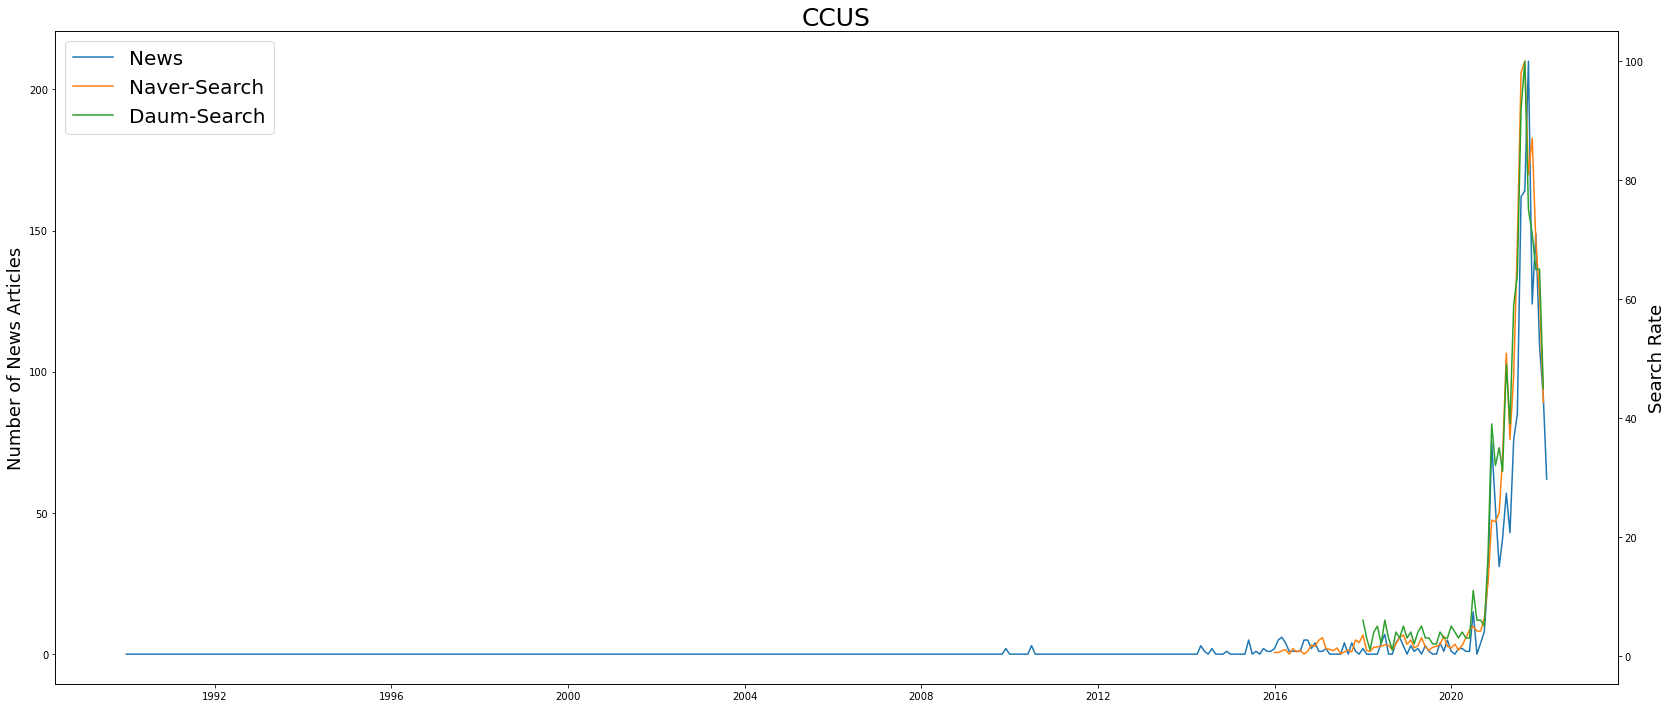

In [205]:
fig = plt.figure(figsize=(28,12))
axe1 = fig.add_subplot()
axe2 = axe1.twinx()

axe1.plot(news_CCUS['date'],news_CCUS['CCUS'],label='News')
axe2.plot([],[],label='News')
axe2.plot(naver_CCUS['날짜'],naver_CCUS['CCUS'],label='Naver-Search')
axe2.plot(daum_CCUS['일'],daum_CCUS['CCUS'],label='Daum-Search')
axe1.set_ylabel('Number of News Articles',fontsize=18)
axe2.set_ylabel('Search Rate',fontsize=18)

axe2.legend(fontsize=20)
plt.title("CCUS",fontsize=25)
ax=plt.gca()

plt.show()

In [246]:
def makeNewsSearchFig(name):
    fig = plt.figure(figsize=(28,12))
    axe1 = fig.add_subplot()
    axe2 = axe1.twinx()

    exec(f"axe1.plot(news_{name}['date'][300:],news_{name}['{name}'][300:],label='News',linewidth=3.0)")
    axe2.plot([],[],label='News',linewidth=3.0)
    exec(f"axe2.plot(naver_{name}['날짜'],naver_{name}['{name}'],label='Naver-Search',color='#02853c',linewidth=3.0)")
    exec(f"axe2.plot(daum_{name}['일'],daum_{name}['{name}'],label='Daum-Search',color='#dfc902',linewidth=3.0)")
    axe1.set_ylabel('Number of News Articles',fontsize=28,fontname='Arial',fontweight='bold')
    axe2.set_ylabel('Search Rate',fontsize=28,fontname='Arial',fontweight='bold')


    axe2.legend(loc="upper left",prop={'family':'Arial', 'weight':'bold','size':28})
    plt.xticks(fontsize=22)
    # plt.title(name,fontsize=25,fontname='Arial',fontweight='bold')
    plt.setp(axe1.get_xticklabels(),fontname='Arial',fontweight='bold',fontsize=22)
    plt.setp(axe1.get_yticklabels(),fontname='Arial',fontweight='bold',fontsize=22)
    plt.yticks(fontname='Arial', fontweight='bold', fontsize=22)
    ax=plt.gca()

    plt.savefig('{}_trend'.format(name),bbox_inces='tight')
    

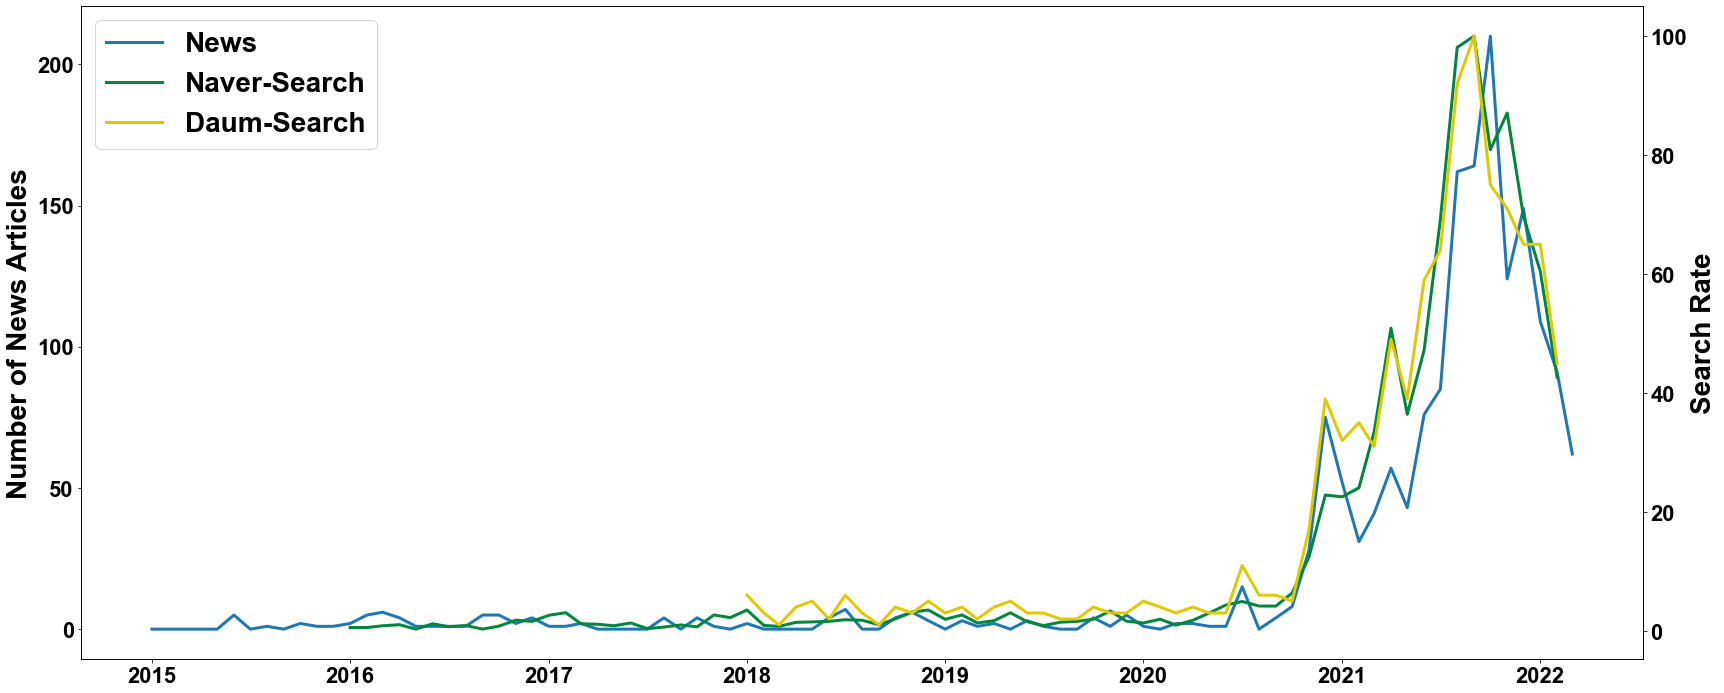

In [249]:
makeNewsSearchFig("CCUS")

In [237]:
news_탄소지중

,date,탄소 지중
0,1990-01-01,0
1,1990-02-01,0
2,1990-03-01,0
3,1990-04-01,0
4,1990-05-01,0
...,...,...
382,2021-11-01,9
383,2021-12-01,4
384,2022-01-01,2
385,2022-02-01,6


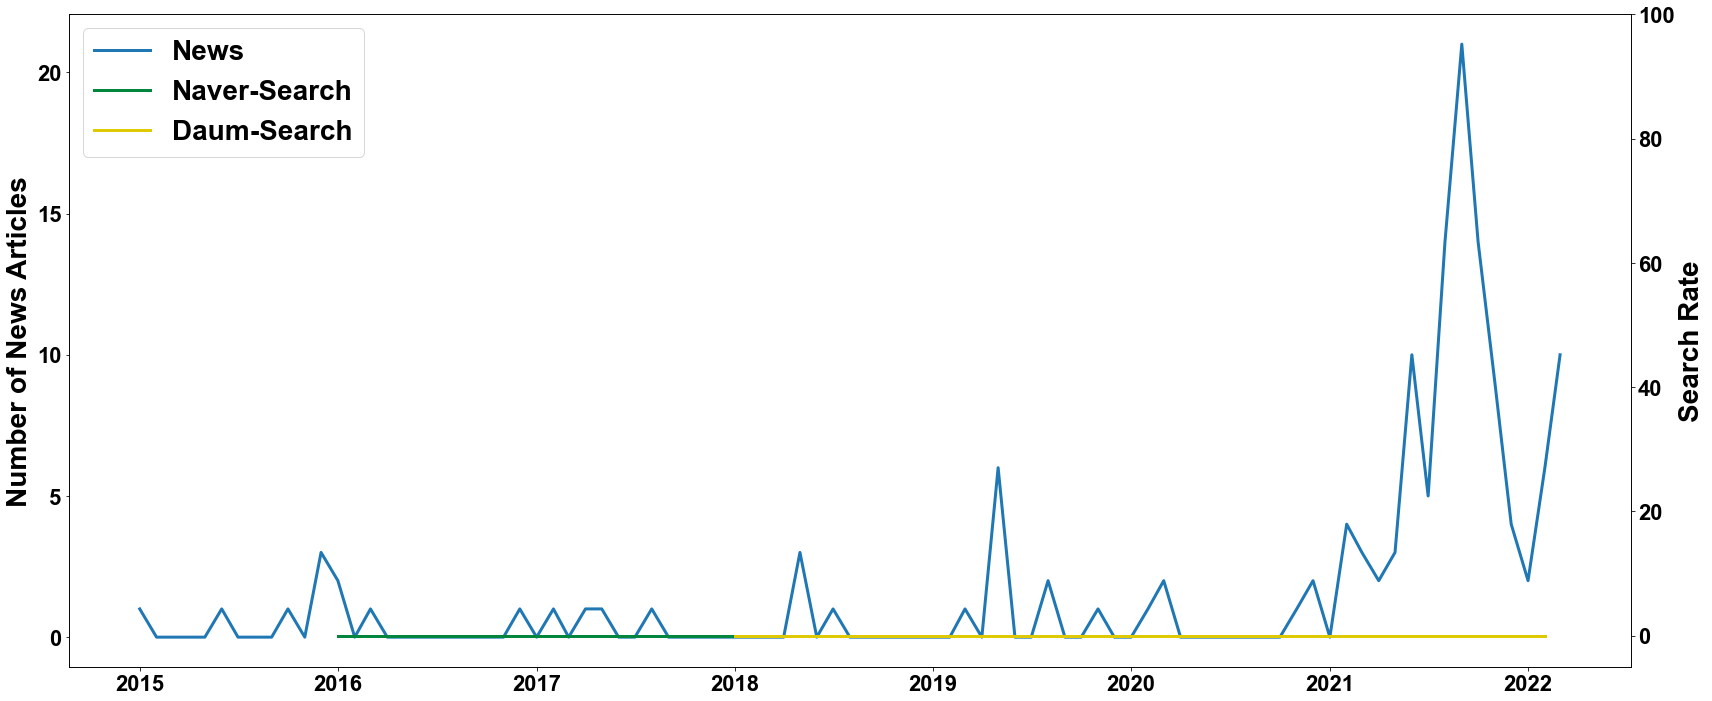

In [245]:
## 탄소지중

fig = plt.figure(figsize=(28,12))
axe1 = fig.add_subplot()
axe2 = axe1.twinx()

axe1.plot(news_탄소지중['date'][300:],news_탄소지중['탄소 지중'][300:],label='News',linewidth=3.0)
axe2.plot([],[],label='News',linewidth=3.0)
axe2.plot(naver_CCUS['날짜'],[0]*len(naver_CCUS['날짜']),label='Naver-Search',color='#02853c',linewidth=3.0)
axe2.plot(daum_CCUS['일'],[0]*len(daum_CCUS['CCUS']),label='Daum-Search',color='#dfc902',linewidth=3.0)
axe1.set_ylabel('Number of News Articles',fontsize=28,fontname='Arial',fontweight='bold')
axe2.set_ylabel('Search Rate',fontsize=28,fontname='Arial',fontweight='bold')
axe2.set_ylim([-5,100])


axe2.legend(loc="upper left",prop={'family':'Arial', 'weight':'bold','size':28})
plt.xticks(fontsize=22)
# plt.title("CCUS",fontsize=25,fontname='Arial',fontweight='bold')
plt.setp(axe1.get_xticklabels(),fontname='Arial',fontweight='bold',fontsize=22)
plt.setp(axe1.get_yticklabels(),fontname='Arial',fontweight='bold',fontsize=22)
plt.yticks(fontname='Arial', fontweight='bold', fontsize=22)
ax=plt.gca()

plt.savefig('탄소지중_trend',bbox_inces='tight')